In [1]:
# Importing necessary libraries
import pandas as pd  # For handling data in tabular format (DataFrames)
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs and visualizations
import re  # For regular expressions (used in text preprocessing)

# Natural Language Toolkit imports for text preprocessing
import nltk
from nltk.corpus import stopwords  # Commonly used words like 'the', 'is', etc., to remove
from nltk.stem.porter import PorterStemmer  # For stemming (reducing words to root form)

# Scikit-learn imports for machine learning
from sklearn.feature_extraction.text import TfidfVectorizer  # To convert text to numerical format using TF-IDF
from sklearn.model_selection import train_test_split  # For splitting dataset into training and testing sets
from sklearn.linear_model import LogisticRegression  # Machine learning model for classification

# Metrics to evaluate model performance
from sklearn.metrics import accuracy_score  # For calculating accuracy of the model
from sklearn.metrics import classification_report  # To get precision, recall, f1-score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # To display confusion matrix

In [2]:
# Reading the dataset files
true = pd.read_csv('True.csv')  # Loading the dataset containing real news articles
fake = pd.read_csv('Fake.csv')  # Loading the dataset containing fake news articles

In [3]:
# Assigning labels to the datasets
fake['label'] = 1  # Label '1' indicates fake news
true['label'] = 0  # Label '0' indicates true (real) news

In [4]:
true.head() #To displays the first 5 rows of the true DataFrame (which contains real news).

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [5]:
fake.head() #displays the first 5 rows of the fake DataFrame (which contains fake news).

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [6]:
true.tail()

,title,text,subject,date,label
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",0


In [7]:
fake.tail()

,title,text,subject,date,label
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",1


In [8]:
news=pd.concat([fake,true],axis=0).reset_index(drop=True)

In [9]:
news.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [10]:
news.shape

(44898, 5)

In [11]:
news=news[['title','text','label']]
news.head()

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1


In [12]:
news['combined']=news['title']+' '+news['text']
news.head()

,title,text,label,combined
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1,Donald Trump Sends Out Embarrassing New Year’...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1,Drunk Bragging Trump Staffer Started Russian ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1,Sheriff David Clarke Becomes An Internet Joke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1,Trump Is So Obsessed He Even Has Obama’s Name...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1,Pope Francis Just Called Out Donald Trump Dur...


In [13]:
x=news.drop(columns='label',axis=1)
y=news['label']

In [14]:
x.head()

,title,text,combined
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,Donald Trump Sends Out Embarrassing New Year’...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,Drunk Bragging Trump Staffer Started Russian ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",Sheriff David Clarke Becomes An Internet Joke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",Trump Is So Obsessed He Even Has Obama’s Name...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,Pope Francis Just Called Out Donald Trump Dur...


In [15]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [16]:
nltk.download('stopwords')
porter=PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\debar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
stop_words=set(stopwords.words('english'))
def stemming(combined):
    new_text=re.sub('[^a-zA-Z]', ' ', combined)
    new_text=new_text.lower()
    new_text=new_text.split()
    new_text=[porter.stem(word) for word in new_text if word not in stop_words]
    new_text=' '.join(new_text)
    return new_text
news['combined']=news['combined'].apply(stemming)

In [18]:
print(news['combined'])

0        donald trump send embarrass new year eve messa...
1        drunk brag trump staffer start russian collus ...
2        sheriff david clark becom internet joke threat...
3        trump obsess even obama name code websit imag ...
4        pope franci call donald trump christma speech ...
                               ...                        
44893    fulli commit nato back new u approach afghanis...
44894    lexisnexi withdrew two product chines market l...
44895    minsk cultur hub becom author minsk reuter sha...
44896    vatican upbeat possibl pope franci visit russi...
44897    indonesia buy billion worth russian jet jakart...
Name: combined, Length: 44898, dtype: object


In [19]:
X=news['combined'].values
Y=news['label'].values

In [20]:
print(X)

['donald trump send embarrass new year eve messag disturb donald trump wish american happi new year leav instead give shout enemi hater dishonest fake news media former realiti show star one job countri rapidli grow stronger smarter want wish friend support enemi hater even dishonest fake news media happi healthi new year presid angri pant tweet great year america countri rapidli grow stronger smarter want wish friend support enemi hater even dishonest fake news media happi healthi new year great year america donald j trump realdonaldtrump decemb trump tweet went welll expect kind presid send new year greet like despic petti infantil gibberish trump lack decenc even allow rise gutter long enough wish american citizen happi new year bishop talbert swan talbertswan decemb one like calvin calvinstowel decemb impeach would make great year america also accept regain control congress miranda yaver mirandayav decemb hear talk includ mani peopl hate wonder hate alan sandov alansandov decemb us

In [21]:
print(Y)

[1 1 1 ... 0 0 0]


In [22]:
vector=TfidfVectorizer()
vector.fit(X)
X=vector.transform(X)

In [23]:
print(X)

  (0, 473)	0.029901721489513068
  (0, 1739)	0.05138826757528657
  (0, 1749)	0.08889530050540473
  (0, 2170)	0.02325325572885059
  (0, 2301)	0.015138822832065134
  (0, 2416)	0.030776265805381363
  (0, 2562)	0.0649607608565772
  (0, 2575)	0.036268116701632415
  (0, 2917)	0.03962726610765806
  (0, 3031)	0.037214846319311164
  (0, 3148)	0.04785142759816799
  (0, 3446)	0.0378234764133366
  (0, 5450)	0.04443233203028609
  (0, 6676)	0.023831801439703443
  (0, 7870)	0.05339370423539277
  (0, 9454)	0.028369643121826767
  (0, 10508)	0.06187015374653721
  (0, 11108)	0.06851913882817916
  (0, 11109)	0.07878871172088633
  (0, 12611)	0.04579308567051352
  (0, 13752)	0.02855422985589162
  (0, 13991)	0.03126141595114052
  (0, 14709)	0.02556349746054079
  (0, 15149)	0.024568186836617927
  (0, 15392)	0.024752264230251966
  :	:
  (44897, 72790)	0.14107018657201614
  (44897, 73487)	0.053117559131630916
  (44897, 73645)	0.03805584493911034
  (44897, 73662)	0.043865646261084495
  (44897, 73678)	0.0331710507

In [24]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [25]:
model=LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

Accuracy of training data:  0.9905180094183531


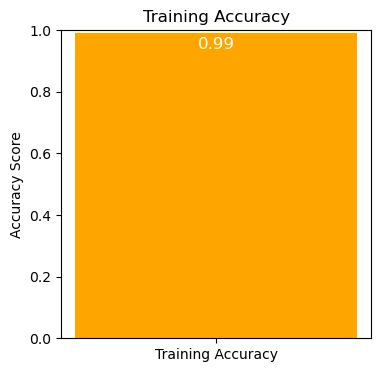

In [26]:
X_train_pred=model.predict(X_train)
train_accuracy=accuracy_score(X_train_pred,Y_train)
print('Accuracy of training data: ',train_accuracy)
plt.figure(figsize=(4, 4))
plt.bar(['Training Accuracy'], [train_accuracy], color='orange')
plt.ylim(0, 1)
plt.ylabel("Accuracy Score")
plt.title("Training Accuracy")
plt.text(0, train_accuracy - 0.05, f"{train_accuracy:.2f}", fontsize=12, color='white', ha='center')
plt.show()

Accuracy of training data:  0.9864884929472902


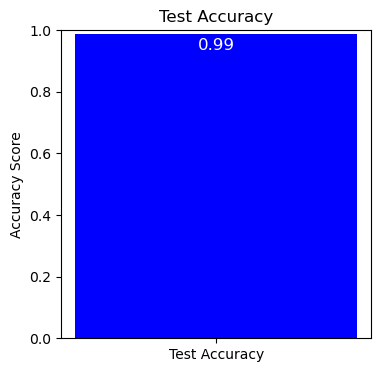

In [27]:
X_test_pred=model.predict(X_test)
test_accuracy=accuracy_score(X_test_pred,Y_test)
print('Accuracy of training data: ',test_accuracy)
plt.figure(figsize=(4, 4))
plt.bar(['Test Accuracy'], [test_accuracy], color='blue')
plt.ylim(0, 1)
plt.ylabel("Accuracy Score")
plt.title("Test Accuracy")
plt.text(0, test_accuracy - 0.05, f"{test_accuracy:.2f}", fontsize=12, color='white', ha='center')
plt.show()

In [28]:
X_new=X_test[1]
pred=model.predict(X_new)
print(pred)

if(pred[0]==0):
    print('It is real news')
else:
    print('It is fake news')

[0]
It is real news


In [29]:
print(Y_test)

[1 0 0 ... 0 0 0]


In [30]:
print(Y_test[1])

0


In [31]:
Y_pred = model.predict(X_test)
print("Classification Report:\n")
print(classification_report(Y_test,Y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6381
           1       0.99      0.98      0.99      7089

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



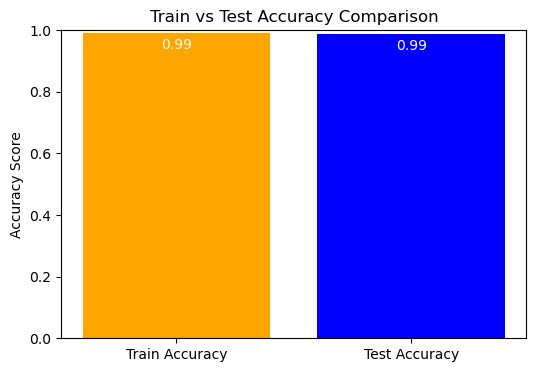

In [32]:
plt.figure(figsize=(6, 4))
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['orange', 'blue'])
plt.ylim(0, 1)
plt.ylabel("Accuracy Score")
plt.title("Train vs Test Accuracy Comparison")
plt.text(0, train_accuracy - 0.05, f"{train_accuracy:.2f}", ha='center', color='white')
plt.text(1, test_accuracy - 0.05, f"{test_accuracy:.2f}", ha='center', color='white')
plt.show()

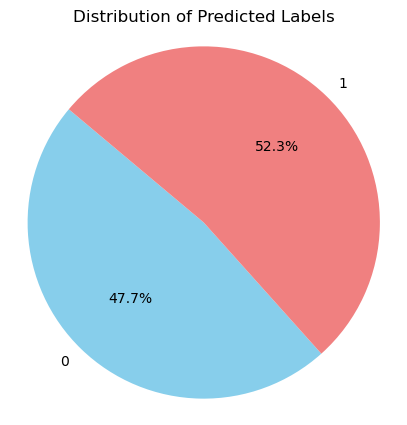

In [33]:
labels, counts = np.unique(Y_pred, return_counts=True)
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title("Distribution of Predicted Labels")
plt.axis('equal')
plt.show()

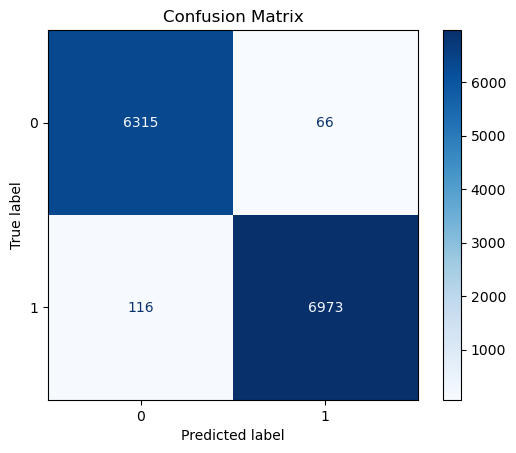

In [34]:
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [35]:
def predict_news(news_input):
    processed = stemming(news_input)
    vectorized = vector.transform([processed])
    prediction = model.predict(vectorized)[0]
    return "🚨 Fake News" if prediction == 1 else "✅ Real News"

In [76]:
print("\nFake News Detection (type 'exit' to quit)\n")
while True:
    user_input = input("Enter news text or headline: ")
    if user_input.lower() == 'exit':
        print("Goodbye!")
        break
    result = predict_news(user_input)
    print("Prediction:", result)
    print("-" * 50)


Fake News Detection (type 'exit' to quit)



Enter news text or headline:  The Senate has passed a bipartisan bill to increase cybersecurity funding for government agencies.


Prediction: ✅ Real News
--------------------------------------------------


Enter news text or headline:  Obama caught on secret tape admitting plan to overthrow Trump with FBI help.


Prediction: 🚨 Fake News
--------------------------------------------------


Enter news text or headline:  exit


Goodbye!


DEBARATI_GHOSH